In [6]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
dummy_data = {
    'PatientID': [123] * 5,
    'Name': ['Sample Name'] * 5,
    'Gender': ['M'] * 5,
    'Birthdate': [pd.Timestamp('2018-04-13')] * 5,
    'Weight': [3.5, 4.5, 5.5, 10.5, 13],
    'Length': [52, 56, 60, 77, 86],
    'HeadCirc': [36, 38, 40, 46.5, 48.5],
    'VisitDate': [pd.Timestamp('2018-04-13'), pd.Timestamp('2018-05-12'), pd.Timestamp('2018-06-09'), pd.Timestamp('2019-04-15'), pd.Timestamp('2019-12-10')]
}

data_df = pd.DataFrame(dummy_data)

# Get age in days
data_df['Age'] = (data_df.VisitDate - data_df.Birthdate)

# Approximate age in months
data_df.Age = data_df.Age.dt.days / 30

data_df

,PatientID,Name,Gender,Birthdate,Weight,Length,HeadCirc,VisitDate,Age
0,123,Sample Name,M,2018-04-13,3.5,52,36.0,2018-04-13,0.000000
1,123,Sample Name,M,2018-04-13,4.5,56,38.0,2018-05-12,0.966667
2,123,Sample Name,M,2018-04-13,5.5,60,40.0,2018-06-09,1.900000
3,123,Sample Name,M,2018-04-13,10.5,77,46.5,2019-04-15,12.233333
4,123,Sample Name,M,2018-04-13,13.0,86,48.5,2019-12-10,20.200000


In [8]:
with open('resources/cdc_charts.json', 'r') as file:
    percentile_data = json.load(file)

In [9]:
def make_subplot(ax, data_df: pd.DataFrame, what: str):
    gender = 'male' if data_df['Gender'][0] == 'M' else 'female'
    percentile_df = pd.DataFrame(percentile_data[what][gender])

    x = 'length' if what == 'weight-for-length' else 'age'

    percentile_df.plot(
        x=x,
        y=['3', '50', '97'],
        kind='line', 
        ax=ax, 
        color='gray', 
        linewidth='1'
    )
    percentile_df.plot(
        x=x,
        y=['5', '10', '25', '75', '90', '95'],
        kind='line', 
        ax=ax, 
        color='gray', 
        linewidth='0.5'
    )

    if what == 'length-for-age':
        x = 'Age'
        y = 'Length'
        x_label = 'Age (in months)'
        y_label = 'Length (in centimeters)'
        x_ticks = np.arange(0, 37, 2)
        x_ticks_minor = np.arange(0, 37, 1)
        y_ticks = np.arange(40, 110, 5)
        y_ticks_minor = np.arange(40, 110, 2.5)
        percentile_label_position = 36
    elif what == 'weight-for-age':
        x = 'Age'
        y = 'Weight'
        x_label = 'Age (in months)'
        y_label = 'Weight (in kilograms)'
        x_ticks = np.arange(0, 37, 2)
        x_ticks_minor = np.arange(0, 37, 1)
        y_ticks = np.arange(0, 21, 1)
        y_ticks_minor = [0]
        percentile_label_position = 36
    elif what == 'head-circumference-for-age':
        x = 'Age'
        y = 'HeadCirc'
        x_label = 'Age (in months)'
        y_label = 'Head Circumference (in centimeters)'
        x_ticks = np.arange(0, 37, 2)
        x_ticks_minor = np.arange(0, 37, 1)
        y_ticks = np.arange(28, 56, 2)
        y_ticks_minor = np.arange(28, 56, 1)
        percentile_label_position = 36
    elif what == 'weight-for-length':
        x = 'Length'
        y = 'Weight'
        x_label = 'Length (in centimeters)'
        y_label = 'Weight (in kilograms)'
        x_ticks = np.arange(45, 103.5, 5)
        x_ticks_minor = np.arange(45, 103.5, 1)
        y_ticks = np.arange(0, 21, 1)
        y_ticks_minor = [0]
        percentile_label_position = 103.5

    data_df.plot(
        x=x,
        y=y,
        kind='line',
        marker='o',
        linestyle='--',
        ax=ax,
        color='black',
        linewidth='1.5'
    )

    ax.set_title(f'{data_df.Name[0]} {what}', color='black', fontsize=18)
    ax.set_ylabel(y_label, color='black', fontsize=16)
    ax.set_xlabel(x_label, color='black', fontsize=16)

    ax.legend().remove()

    # Add percentile label to each line
    last_vals = percentile_df.iloc[-1, 1:]
    for col, val in last_vals.items():
        if col not in ('5', '95'):
            ax.annotate(xy=(percentile_label_position, val), s=str(col), color='gray')

    ax.patch.set_facecolor('white')
    ax.patch.set_edgecolor('white')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='both', colors='black', labelsize=12)

    # set grid interval
    ax.set_xticks(x_ticks)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_yticks(y_ticks)
    ax.set_yticks(y_ticks_minor, minor=True)

    ax.grid(which='major', linewidth='0.5', linestyle='-', color='black')
    ax.grid(which='minor', linewidth='0.5', linestyle=':', color='black')

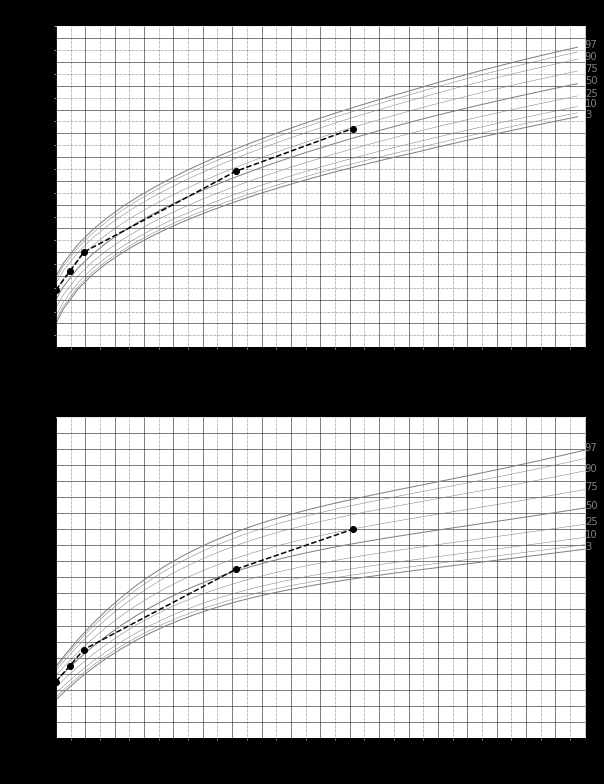

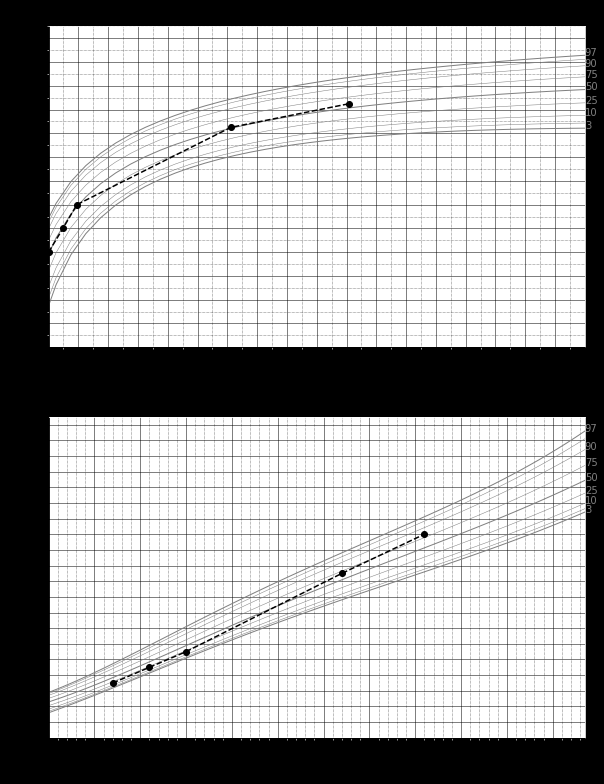

In [10]:
with PdfPages('out/test/four_plots.pdf') as pdf:
    fig, axes = plt.subplots(2, 1, figsize=(8.5, 11))

    make_subplot(axes[0], data_df, 'length-for-age')
    make_subplot(axes[1], data_df, 'weight-for-age')

    fig.tight_layout()
    pdf.savefig(facecolor='white', papertype='letter', bbox_inches='tight', pad_inches=0.75)
    plt.show()
    plt.close()

    fig, axes = plt.subplots(2, 1, figsize=(8.5, 11))

    make_subplot(axes[0], data_df, 'head-circumference-for-age')
    make_subplot(axes[1], data_df, 'weight-for-length')

    fig.tight_layout()
    pdf.savefig(facecolor='white', papertype='letter', bbox_inches='tight', pad_inches=0.75)
    plt.show()
    plt.close()